Toh Rayner Jing Xiang - HW1

In [ ]:
!pip install d2l==1.0.3
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

2.1. Data Manipulation

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

print(X == Y)
print(X > Y)
print(X < Y)

a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
c = torch.arange(4).reshape((1, 2, 2))
print(a, b)
print(a, c)
print(b, c)

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])
tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])
tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])
tensor([[0],
        [1],
        [2]]) tensor([[0, 1]])
tensor([[0],
        [1],
        [2]]) tensor([[[0, 1],
         [2, 3]]])
tensor([[0, 1]]) tensor([[[0, 1],
         [2, 3]]])


This section covers basic but very useful operations in PyTorch. These operations will definitly come in useful as we dive deeper into the course. I also like how some of the features such as putting -1 to infer the size of the array is pretty handy.

2.2. Data Preprocessing

In [ ]:
import os
import pandas as pd

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

data = pd.read_csv(data_file)
print(data)
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

inputs = inputs.fillna(inputs.mean())
print(inputs)

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000
   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True
   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

I believe that the first steps we can take to prepare our data is to clean it. For example, if a certain feature consists of mostly NaN values, we can consider removing that feature as a whole. Otherwise, if it's a numerical feature, we could replace the NaN by the mean value of all the other non-NaN values. I believe that we can tune our approach to preparing the data, according to how well the model performs with it.

We are also definitely limited by the computing power of our laptops/servers when processing larger datasets. Hence we would definitely need more horsepower if we choose to use larger datasets.

If the data has a large number of categories, I would see where I could remove unnecessary features. The NaN example I mentioned above is one way to do it. As for category labels that are all unique, like ids, I believe it makes no sense to include them since they probably occur only once or few times, so there's not much pattern for the model to learn. We could consider dropping these features or using something like frequency encoding.

2.3. Linear Algebra

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

x = torch.arange(3, dtype=torch.float32)
x, x.sum()

y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

A.shape, x.shape, torch.mv(A, x), A@x

B = torch.ones(3, 4)
torch.mm(A, B), A@B

u = torch.tensor([3.0, -4.0])
torch.norm(u)

torch.abs(u).sum()

torch.norm(torch.ones((4, 9)))

tensor(6.)

This section does introduce various useful functions and methods in linear algebra that will compliment the PyTorch basics that were covered in the section 2.1. It's nice to see that a lot of the complicated computational work has been abstracted away into these handy linear algerba functions. I believe that they would be useful in implement our deep learning models down the road.

2.5. Automatic Differentiation

In [ ]:
x = torch.arange(4.0)
x.requires_grad_(True)
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])


I learnt that automatic differentiation is a great technique to accurately compute derivatives of functions, especially ones that are very complex with many variables. The basis of it uses the chain rule to compute derivatives. I feel that forward differentiation is best suited for functions with fewer inputs than outputs, while the backward differentiation is best suited for cases where there are fewer outputs than inputs. I foresee the latter being useful as we dive deeper into neural networks and deep learning.

3.1. Linear Regression

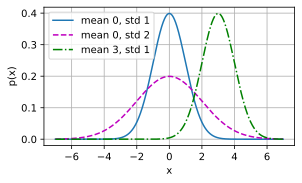

In [ ]:
import math

n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

I believe I can see linear regression as the most basic form of neural networks that we can come across, one with no hidden layers. I believe it'll be important to understand them well as they introduce various components that are important in optimising future neural networks that we will use in deep learning in the future.

3.2. Object-Oriented Design for Implementation

In [ ]:
def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [ ]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

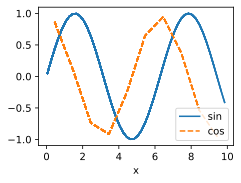

In [ ]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

I believe this OOP design should be the ideal way to write deep learning models. The abstraction into various classes and its accompanying methods allows us to reuse the various logic across different areas in our code, making it reusable.

3.4. Linear Regression Implementation from Scratch

In [ ]:
class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
# trainer.fit(model, data)

Since linear regression can be regarded as the most basic neural network, I believe this section is useful as it provides us with a basic blueprint of how we can build future neural networks, such as defining the loss function and optimisation algorithm. The training stage is also important because it shows how the things we learnt in the previous sections such as automatic differentitation come into play when developing and training our models.

4.1. Softmax Regression


Softmax allows us to transform raw model outputs into probabilities that can easily interpreted by us, making it useful for multi-class classification tasks in neural networks. They represent the probability that an input belongs to each possible class, and I feel it's usage in image classification is highly justified as the model usually needs to decide between multiple categories.

4.2. The Image Classification Dataset

In [ ]:
import torchvision
from torchvision import transforms

class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)
data.train[0][0].shape

100%|██████████| 26421880/26421880 [00:01<00:00, 18259581.17it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 338707.50it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6096737.16it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8640366.94it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



torch.Size([1, 32, 32])

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


'13.38 sec'

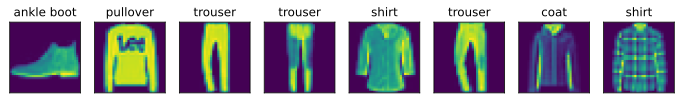

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

I believe this dataset is highly useful in testing our models, since it gives most researchers and people like us a good benchmark to work against. Standardised datasets like this are highly useful as they can be used to compare the performance and accuracies of 2 different models.

4.3. The Base Classification Model

In [ ]:
class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

I believe this classifier class offers a good foundation for us to build upon implmenting classification in our future models.

4.4. Softmax Regression Implementation from Scratch

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2338, 0.2276, 0.1051, 0.1953, 0.2382],
         [0.1840, 0.2506, 0.1855, 0.1848, 0.1951]]),
 tensor([1., 1.]))

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

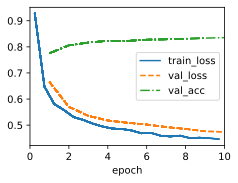

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

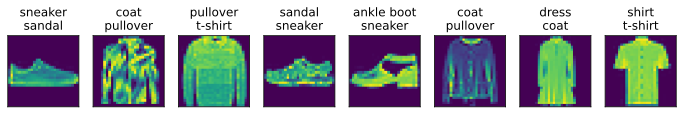

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

I find it interesting to see how we can use softmax in a real-world dataset, using it to classify apparel and other articles of clothing. I also find it interesting to play with the hyperparameters of the code in this section, as doing so would yield different results such as different validation losses. This are just some parts of models that we need to tweak in order to optimise our models.

5.1. Multilayer Perceptrons

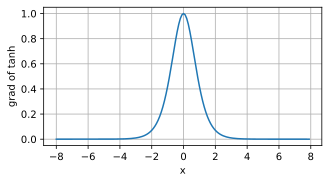

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

As per the lab session we did in class, I find it interesting that most deep learning models struggle to classify datasets withouot the presence of activation functions like ReLU. When we enable the use of activation functions such as ReLU and sigmoid, we noticeably obtain better results. Furthermore, what's interesting is that since ReLU is a piecewise function, I find it interesting that it forms the piecewise linear graphs when it was trying to classify a cluster of points during the lab in class.

5.2. Implementation of Multilayer Perceptrons

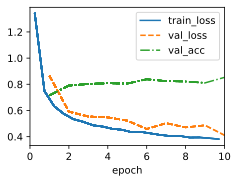

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

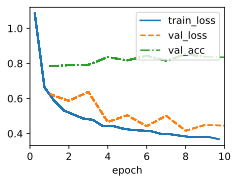

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

I think it's important to get a working model out first, after which you can take a look at optimising hyperparameters to get the best performance out of your model. I think the best way to optimise hyperparameters would be to keep all other parameters constant while changing one particular variable. Then, we could use some sort of random number/float generator to test out different values for that particular parameter. Do this for all the parameters and try out different combinations and permutations to obtain the best possible model.

5.3. Forward Propagation, Backward Propagation, and Computational Graphs

I believe backpropagation would be more widely used in deep learning models and it's crucial that we understad it's usage in them. It's also important to take note of the hardware considerations when doing these computations.